<img src="./images/logo-ensae.jpg" width = 40%><img src="./images/logo-ipparis.jpg" width = 30%>

**"Geometric Methods in Machine Learning", S2 2018-19** 
# *Studying Time Series using Dynamic Time Warping*  

**Yosuke IJIRI**, *Mastère Spécialisé Data Science, ENSAE ParisTech*  

Outcome: a zip file containing your report in pdf (not a .doc) and code in whatever format (you can send a notebook).

## Objectives
Download the Sales Transactions Weekly Dataset. You will recover 800 time series of sales of different products with 52 timestamps (one for each week). Alternatively, you can also download any other dataset of your liking, with the same type, i.e. labelled time series, with a few hundreds or thousands of time series of moderate length.

- Implement the **dynamic time warping distance** in your programming language of choice.
- Compute the **dynamic time warping distance matrix** between all 800 instances and try to embed these points in 2 dimensions using **Isomap** (you should implement it, not use scikitlean or other public implementations). Display these results.
- Embed now these points in a **higher dimension using still MDS** (e.g. 5). Check that the stress you have found is indeed smaller. Use a simple k-means algorithm on these representations to gather these 800 observations in k subgroups (set k as you wish).
- In order to visualize representative examples for each class in these samples, we consider time series averaging. We will compute an average for each of the k clusters computed in the previous question. Code to compute such averages is available in R or Python. Plot these averages and compare them with the usual Euclidean averaging you would obtain by simply summing these time-series.

## Abstract
Blablabla

## Overview

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## 1. Data Preparation

In [60]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [21]:
df = pd.read_csv('./data/Sales_Transactions_Dataset_Weekly.csv')
df.head()

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [24]:
# Take out the normalized values from the dataframe
idx = [i for i in range(df.shape[1]) if 'Normalized' in df.columns[i]]
ndf = df.iloc[:, idx]
ndf.head()

,Normalized 0,Normalized 1,Normalized 2,Normalized 3,Normalized 4,Normalized 5,Normalized 6,Normalized 7,Normalized 8,Normalized 9,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,0.44,0.50,0.39,0.28,0.56,0.50,0.61,1.00,0.17,0.61,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,0.70,0.60,0.30,0.20,0.70,0.10,0.60,0.30,0.30,0.30,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,0.36,0.73,0.45,0.55,0.64,0.45,0.36,0.91,0.82,0.27,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,0.59,0.35,0.65,0.18,0.41,0.24,0.41,0.65,0.65,0.53,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,0.33,0.13,0.67,0.53,0.20,0.27,0.40,0.73,0.40,0.40,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40


In [34]:
# Transform the data from dataframe to numpy.ndarry
data = ndf.values
print(type(data))
print(data.shape)

<class 'numpy.ndarray'>
(811, 52)


## 2. Compute the pairwise dynamic time warping distance matrix

[0.44 0.5  0.39 0.28 0.56 0.5  0.61 1.   0.17 0.61 0.44 0.61 0.72 0.33
 0.33 0.33 0.61 0.33 0.   0.5  0.11 0.44 0.22 0.5  0.11 0.33 0.22 0.39
 0.11 0.44 0.22 0.39 0.5  0.17 0.11 0.61 0.39 0.33 0.5  0.78 0.22 0.44
 0.06 0.22 0.28 0.39 0.5  0.   0.22 0.17 0.11 0.39]
[0.7 0.6 0.3 0.2 0.7 0.1 0.6 0.3 0.3 0.3 0.2 0.2 0.6 0.2 0.  0.6 0.2 0.7
 0.7 0.9 0.4 0.7 0.2 0.4 0.5 0.3 0.5 0.8 0.5 0.5 0.3 0.1 0.3 0.2 0.3 1.
 0.5 0.2 0.7 0.3 0.2 0.5 0.2 0.4 0.5 0.1 0.1 0.4 0.5 0.1 0.6 0. ]
(52,)


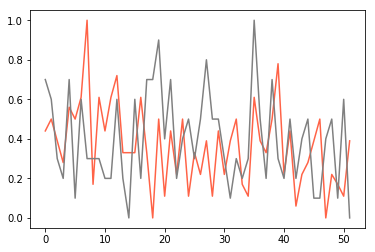

In [252]:
# Plot two sample time series
print(data[0])
print(data[1])
print(data[0].shape)
plt.plot(data[0], color='tomato')
plt.plot(data[1], color='gray');

In [257]:
def DTW(x, y):
    '''
    Returns the Path Cost matrix and the DTW distance
    '''
    nrow = len(x)  # 52
    ncol = len(y)  # 52
    
    # Initialise the cost matrix
    C = np.zeros([nrow,ncol])
    C[0, :], C[:, 0] = np.infty, np.infty
    C[0,0] = 0
    
    # Bellman Recursion
    for i in range(nrow-1):
        for j in range(ncol-1):
            D = np.abs(x[i] - y[j])
            C[i+1][j+1] = D + np.min([C[i+1][j], C[i][j], C[i][j+1]])
    
    return C

In [261]:
def opt_path(dtw):
    '''
    Returns the optimal path
    '''
    rlen = dtw.shape[0]
    clen = dtw.shape[1]
    
    r = rlen-1
    c = clen-1

    # Initialise the paths
    r_path = [r]
    c_path = [c]
    cost_path = [dtw[r,c]]   

    while (r!=0 or c!=0):
        cost_temp = dtw[r, c]
    
        if dtw[r, c-1] <= cost_temp:
            r_temp = r
            c_temp = c-1
            cost_temp = dtw[r, c-1]    
        if dtw[r-1, c-1] <= cost_temp:
            r_temp = r-1
            c_temp = c-1
            cost_temp = dtw[r-1, c-1] 
        if dtw[r-1, c] <= cost_temp:
            r_temp = r-1
            c_temp = c
            cost_temp = dtw[r-1, c]
        
        r = r_temp
        c = c_temp
        r_path += [r]
        c_path += [c]
        cost_path += [cost_temp]
        
    r_path = list(reversed(r_path))[1:]
    c_path = list(reversed(c_path))[1:]
    cost_path = list(reversed(cost_path))[1:]

    return(r_path, c_path, cost_path, rlen, clen)

In [279]:
# Visualisation of the Optimal Path
def opt_path_vis(r_path, c_path, cost_path, rlen, clen):
    nrow = rlen
    ncol = clen

    plt.figure(figsize=(rlen/2,clen/2))
    plt.scatter(np.array(r_path),np.array(c_path), label="Optimal Path Points (cost)")
    plt.xlim(0,clen-.5)
    plt.ylim(rlen-.5,0)
    for i in range(nrow):
        plt.axhline(i+1, linestyle='-', color='lightgray')
        plt.axvline(i+1, linestyle='-', color='lightgray')
    for i in range(len(r_path)):
        plt.annotate(s="("+str(round(cost_path[i], 2))+")", xy=(r_path[i]+0.1,c_path[i]-0.2))
    plt.xticks(range(ncol))
    plt.yticks(range(nrow))
    plt.xlabel("Time Series 1")
    plt.ylabel("Time Series 2")
    plt.title("Optimal Path")
    plt.legend()
    plt.savefig('./data/optimal_path.png');

In [266]:
# Put all the functions together in one function
def dtw_method(ts1, ts2):
    dtw = DTW(ts1, ts2)
    res = opt_path(dtw)
    return opt_path_vis(res[0],res[1],res[2],res[3],res[4])

[273, 718]


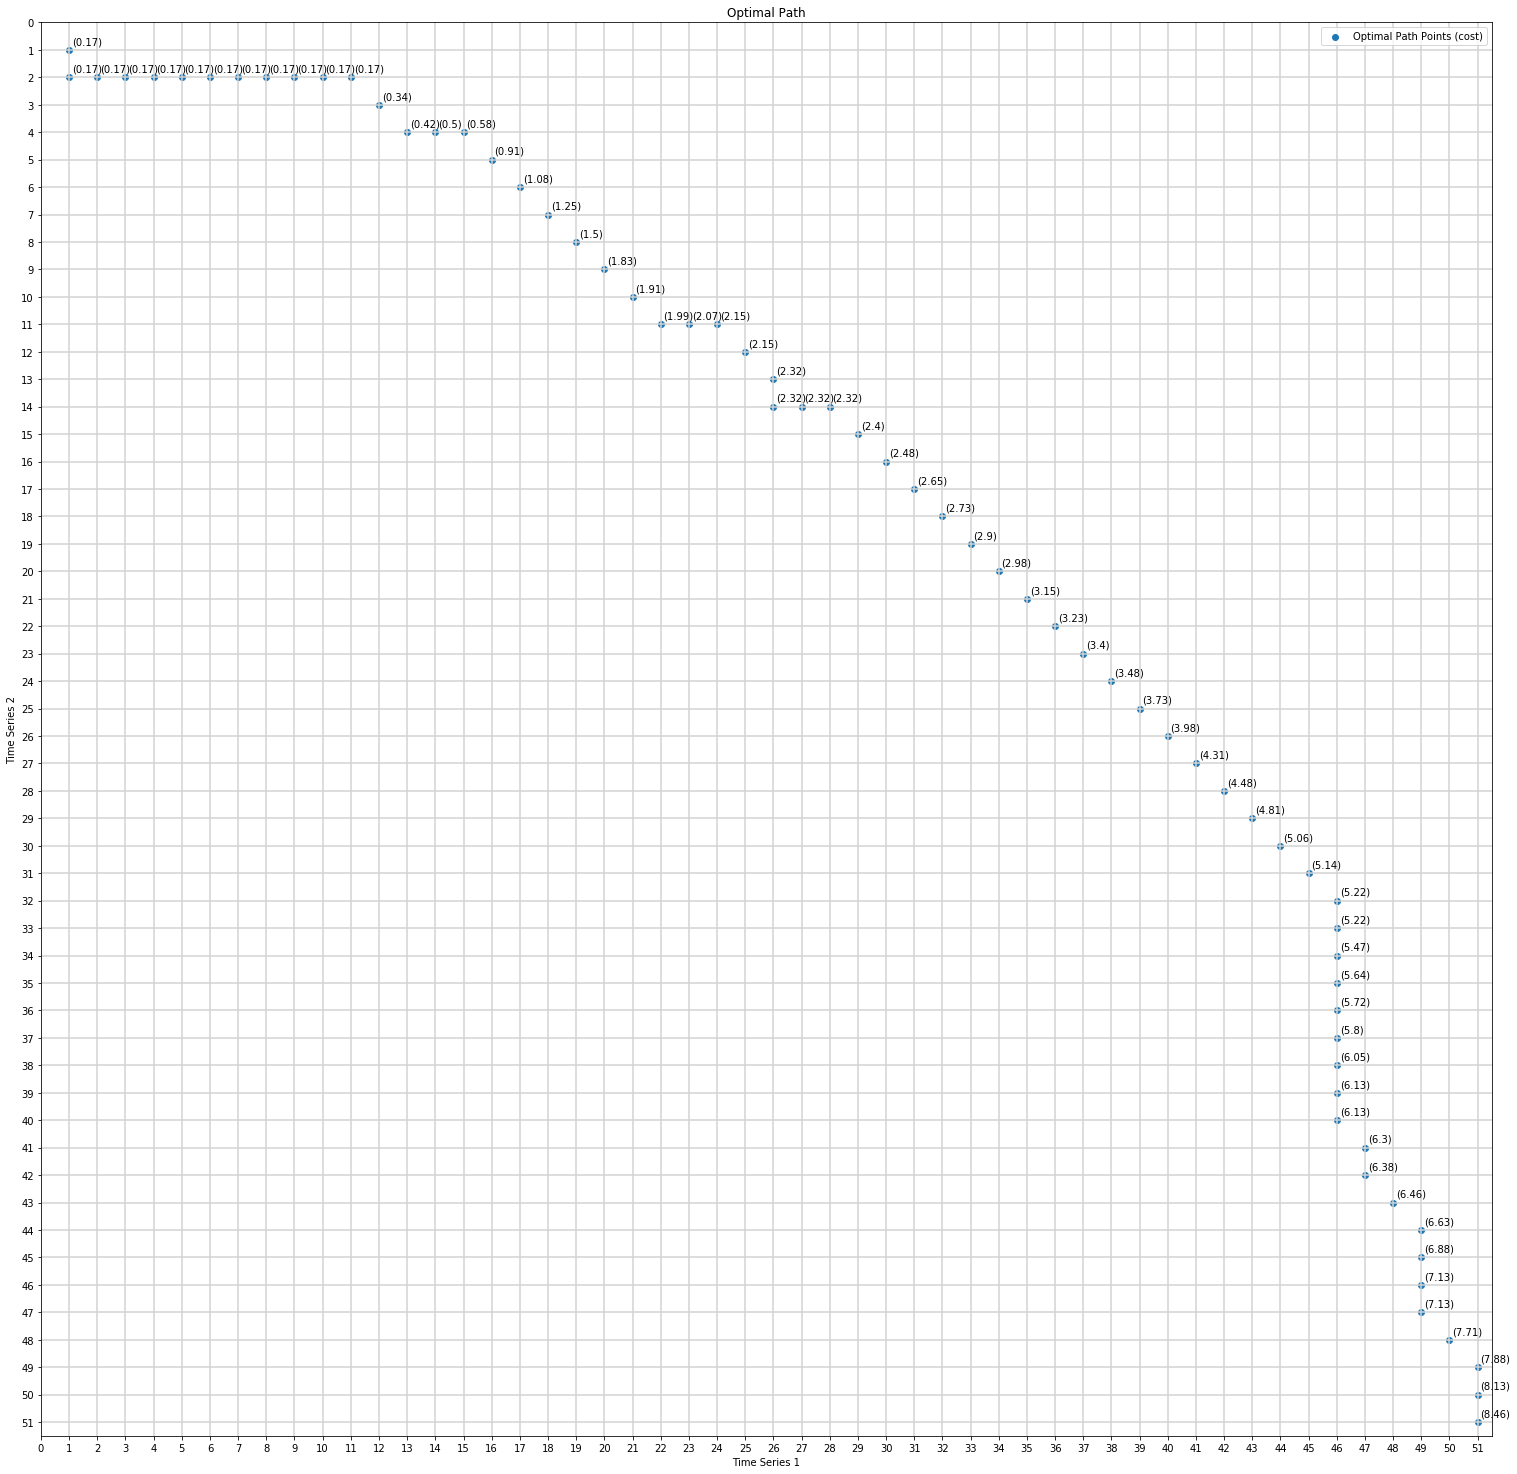

In [328]:
# To check the functionality, we compute the distance between randomly chosen two time series from the data
dat = random.sample(range(data.shape[0]), 2)
print(dat)
dtw_method(data[dat[0]], data[dat[1]])